In [24]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [25]:
# -------------------- Ayarlar --------------------
image_size = 32
num_classes = 43
base_dir = './dataset'  # tüm veriler bu klasörde
# -------------------- Eğitim Verilerini Yükle (klasör yapısından) --------------------
X = []
y = []

train_path = os.path.join(base_dir, 'Train')

for class_id in range(num_classes):
    class_dir = os.path.join(train_path, str(class_id))
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(class_id)
        except Exception as e:
            print(f"Hata {img_path} dosyasında: {e}")

X = np.array(X) / 255.0
y = to_categorical(np.array(y), num_classes)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

FileNotFoundError: [WinError 3] Sistem belirtilen yolu bulamıyor: './dataset\\Train\\0'

In [10]:
# -------------------- Model --------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# -------------------- Eğitim --------------------
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3422 - loss: 2.4618 - val_accuracy: 0.9105 - val_loss: 0.3679
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8690 - loss: 0.4480 - val_accuracy: 0.9676 - val_loss: 0.1617
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9321 - loss: 0.2336 - val_accuracy: 0.9792 - val_loss: 0.0963
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9563 - loss: 0.1543 - val_accuracy: 0.9844 - val_loss: 0.0749
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9653 - loss: 0.1146 - val_accuracy: 0.9856 - val_loss: 0.0652
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9683 - loss: 0.1107 - val_accuracy: 0.9888 - val_loss: 0.0528
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9786 - loss: 0.0726 - val_accuracy: 0.9894 - val_loss: 0.0457
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9800 - loss: 0.0678 - val_accu

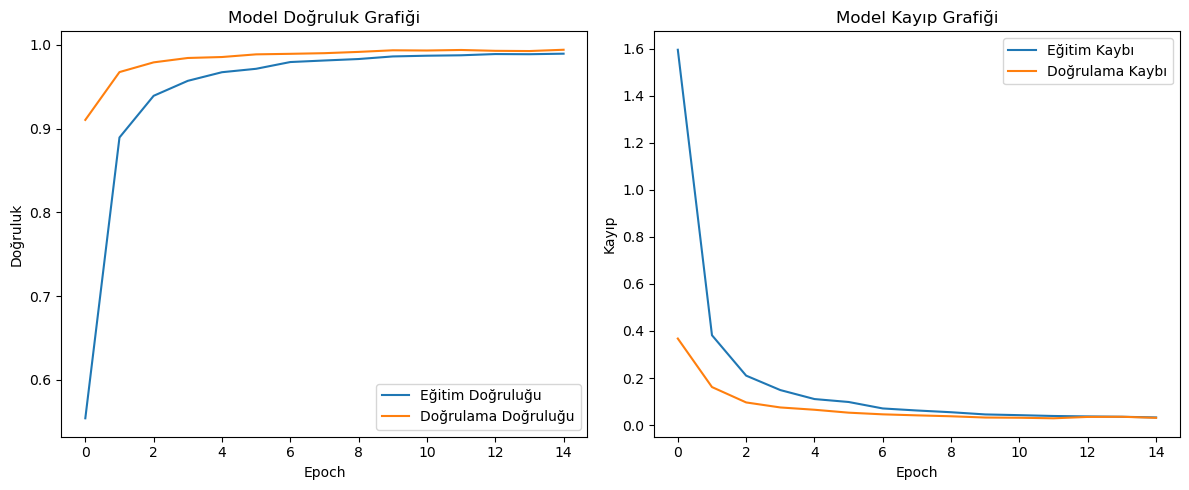

In [22]:
import matplotlib.pyplot as plt

# Doğruluk (accuracy) grafiği
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp (loss) grafiği
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
# -------------------- Test Verilerini Yükle --------------------
test_df = pd.read_csv(os.path.join(base_dir, 'Test.csv'))

X_test = []
y_test = []

for _, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Test verileri"):
    img_path = os.path.join(base_dir, row['Path'])
    try:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (image_size, image_size))
        X_test.append(img)
        y_test.append(row['ClassId'])
    except Exception as e:
        print(f"Hata {img_path} dosyasında: {e}")

X_test = np.array(X_test) / 255.0
y_test = to_categorical(np.array(y_test), num_classes)

Test verileri: 100%|████████████████████████████████████████████████████████████| 12630/12630 [01:50<00:00, 114.10it/s]


In [20]:
# -------------------- Test Et --------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Doğruluğu: {test_acc * 100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.1752
Test Doğruluğu: 96.43%


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


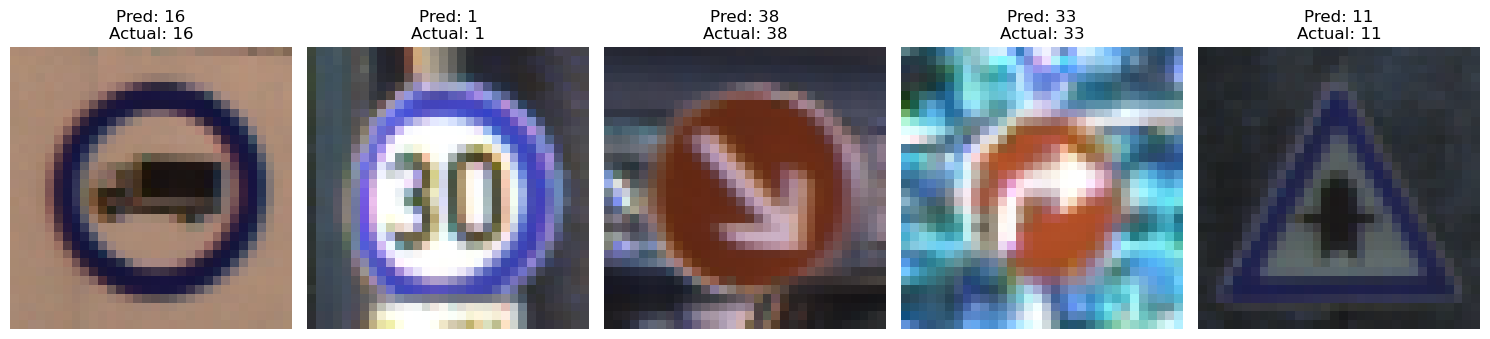

In [23]:
# -------------------- İlk 5 Tahmin ve Gerçek Değerler --------------------
import numpy as np

# Tahmin yap
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# İlk 5 tahmini ve görseli göster
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Pred: {predicted_classes[i]}\nActual: {actual_classes[i]}")
plt.tight_layout()
plt.show()


In [21]:
model.save('trafik_modeli.h5')
